In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. 차원축소

In [5]:
from sklearn.datasets import load_breast_cancer
cencer = load_breast_cancer()

In [6]:
from sklearn.preprocessing import StandardScaler
cencer_std = StandardScaler().fit_transform(cencer.data)

In [34]:
cencer_std[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

- Scikit-Learn 차원 축소

- 2차원

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca2 = PCA(n_components=5)
pca3 = PCA(n_components=10)

In [48]:
cencer_pca = pca.fit_transform(cencer_std)
cencer_pca2 = pca2.fit_transform(cencer_std)
cencer_pca3 = pca3.fit_transform(cencer_std)

In [49]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

- 분류정확도

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [51]:
# 원본 데이터로 분류

X_train, X_test, y_train, y_test = train_test_split(
    cencer_std, cencer.target, stratify=cencer.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9790209790209791

In [52]:
# PCA 데이터로 분류

X_train, X_test, y_train, y_test = train_test_split(
    cencer_pca, cencer.target, stratify=cencer.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9440559440559441

In [55]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021
)
    rfc = RandomForestClassifier(random_state=2021)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return np.round(score, 4)

print('PCA 2 정확도: ', pca_accuracy(cencer_pca, cencer.target))
print('PCA 2 정확도: ', pca_accuracy(cencer_pca2, cencer.target))
print('PCA 2 정확도: ', pca_accuracy(cencer_pca3, cencer.target))

PCA 2 정확도:  0.9441
PCA 2 정확도:  0.965
PCA 2 정확도:  0.972


- globals(): 전역변수를 딕셔너리에 담아두기

In [63]:
for dim in [2,5, 10] :
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cencer_pca{dim}'] = globals()[f'pca{dim}'].fit_transform(cencer_std)
    acc = pca_accuracy(globals()[f'cencer_pca{dim}'], cencer.target)
    print(f'PCA {dim} 정확도: {acc}')
print('원데이터 정확도:', pca_accuracy(cencer_std, cencer.target))


PCA 2 정확도: 0.9441
PCA 5 정확도: 0.965
PCA 10 정확도: 0.972
원데이터 정확도: 0.979


2차원 시각화

In [18]:
df = pd.DataFrame(cencer.data, columns=cencer.feature_names)
df['target'] = cencer.target
df['PC1'] = cencer_pca[:,0]
df['PC2'] = cencer_pca[:,1]
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,PC1,PC2
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,9.192837,1.948583
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,2.387802,-3.768172
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,5.733896,-1.075174


No handles with labels found to put in legend.


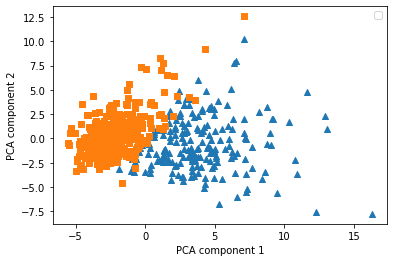

In [19]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker,)
    

plt.legend()
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [21]:
kmeans.fit(cencer_std)

KMeans(n_clusters=3, random_state=2021)

In [22]:
kmeans.labels_

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [23]:
df['target'] = cencer.target
df['cluster'] = kmeans.labels_
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,PC1,PC2,cluster
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,6.439315,-3.576817,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,3.793382,-3.584048,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1.256179,-1.902297,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,10.374794,1.672010,1
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1,-5.475243,-0.670637,0


In [24]:
df.groupby(['target', 'cluster']).count()

mean radius  mean texture  mean perimeter  mean area  \
target cluster                                                         
0      0                 38            38              38         38   
       1                110           110             110        110   
       2                 64            64              64         64   
1      0                321           321             321        321   
       2                 36            36              36         36   

                mean smoothness  mean compactness  mean concavity  \
target cluster                                                      
0      0                     38                38              38   
       1                    110               110             110   
       2                     64                64              64   
1      0                    321               321             321   
       2                     36                36              36   

                mean concave points  mean symmetry  mean fractal dimension  \
target cluster                                                               
0      0                         38             38                      38   
       1                        110            110                     110   
       2                         64             64                      64   
1      0                        321            321                     321   
       2                         36             36                      36   

                ...  worst perimeter  worst area  worst smoothness  \
target cluster  ...                                                  
0      0        ...               38          38                38   
       1        ...              110         110               110   
       2        ...               64          64                64   
1      0        ...              321         321               321   
       2        ...               36          36                36   

                worst compactness  worst concavity  worst concave points  \
target cluster                                                             
0      0                       38               38                    38   
       1                      110              110                   110   
       2                       64               64                    64   
1      0                      321              321                   321   
       2                       36               36                    36   

                worst symmetry  worst fractal dimension  PC1  PC2  
target cluster                                                     
0      0                    38                       38   38   38  
       1                   110                      110  110  110  
       2                    64                       64   64   64  
1      0                   321                      321  321  321  
       2                    36                       36   36   36  

[5 rows x 32 columns]

군집화

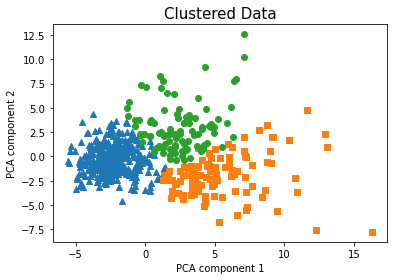

In [25]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker )
    
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Clustered Data', fontsize=15)
plt.show()

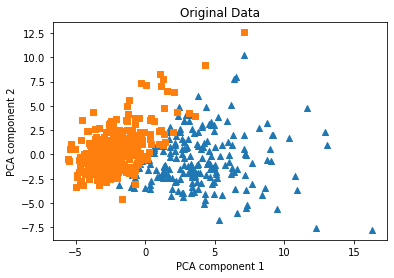

In [26]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker)

plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Original Data')
plt.show()

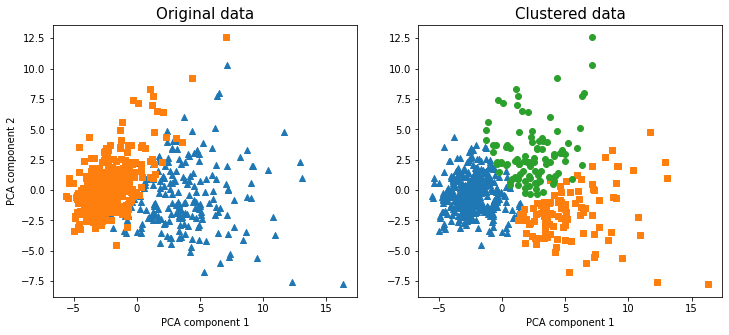

In [27]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker)
    if k == 0:
        ax.set_title('Original data', fontsize = 15)
        ax.set_ylabel('PCA component 2')

    else:
        ax.set_title('Clustered data', fontsize = 15)
    ax.set_xlabel('PCA component 1')

plt.show()

- 실루엣

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(cencer_std, df.cluster)
df['실루엣 계수'] = score_samples
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,PC1,PC2,cluster,실루엣 계수
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.66560,0.7119,0.2654,0.4601,0.11890,0,9.192837,1.948583,1,0.109598
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.18660,0.2416,0.1860,0.2750,0.08902,0,2.387802,-3.768172,1,0.154567
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.42450,0.4504,0.2430,0.3613,0.08758,0,5.733896,-1.075174,1,0.296081
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.86630,0.6869,0.2575,0.6638,0.17300,0,7.122953,10.275589,2,0.191603
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.20500,0.4000,0.1625,0.2364,0.07678,0,3.935302,-1.948072,1,0.263675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.21130,0.4107,0.2216,0.2060,0.07115,0,6.439315,-3.576817,1,0.368482
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.19220,0.3215,0.1628,0.2572,0.06637,0,3.793382,-3.584048,1,0.271214
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.30940,0.3403,0.1418,0.2218,0.07820,0,1.256179,-1.902297,0,0.106925
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.86810,0.9387,0.2650,0.4087,0.12400,0,10.374794,1.672010,1,0.119417


In [29]:
df['실루엣 계수'].mean()

0.3143840098608098

In [30]:
silhouette_score(cencer_std, df.cluster)

0.3143840098608098

실루엣 계수 시각화

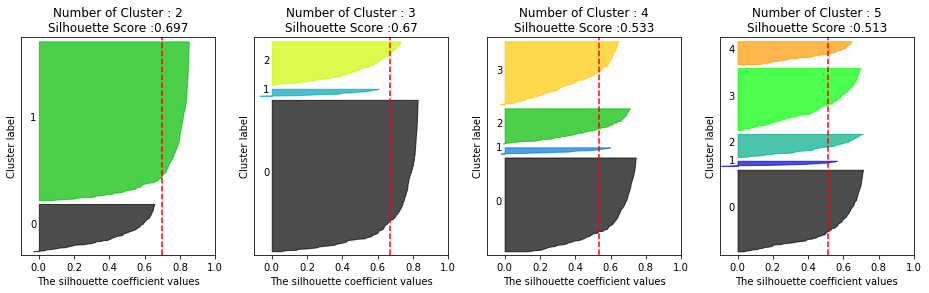

In [33]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], cencer.data)